#Downloading the Datasets

Installing Opendatasets library

In [1]:
!pip install opendatasets

Downloading datasets from Kaggle

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kairavnandi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets


100%|██████████| 99.5k/99.5k [00:00<00:00, 208MB/s]

#Importing Required Libraries

In [3]:
#for SQL queries
import sqlite3 as sql

#for data reading, preprocessing, visualisation, explanation and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler as ss, LabelEncoder as le
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score as acc, confusion_matrix as cm, classification_report as cr
import shap

#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#Reading Data

Converting Datasets into their Respective Dataframes

In [4]:
train_df = pd.read_csv("/content/telecom-churn-datasets/churn-bigml-80.csv")
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
test_df = pd.read_csv("/content/telecom-churn-datasets/churn-bigml-20.csv")
test_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


Gathering Information about Dataframes

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

#Using SQL for Data Aggregation

Loading Training Set into SQLite

In [8]:
conn = sql.connect('train_churn.db')
train_df.to_sql('churn-bigml-80', conn, if_exists = 'replace', index = False)

2666

Running SQL Aggregation Queries

In [9]:
#Total Call Durations categorised by time of day and international calls

query1 = """
SELECT
  SUM([Total day minutes]) AS [Net total- day minutes],
  SUM([Total eve minutes]) AS [Net total- eve minutes],
  SUM([Total night minutes]) AS [Net total- night minutes],
  SUM([Total intl minutes]) AS [Net total- intl minutes]
FROM [churn-bigml-80];
"""

pd.read_sql(query1, conn)

,Net total- day minutes,Net total- eve minutes,Net total- night minutes,Net total- intl minutes
0,478498.0,534229.5,536316.4,27291.9


In [10]:
#No. of Customer complaints and average per customer

query2 = """
SELECT
    COUNT(*) AS [Total complaints],
    ROUND(AVG([Customer service calls]), 2) AS [Avg complaints per customer]
FROM [churn-bigml-80]
WHERE [Customer service calls] >= 3;
"""

pd.read_sql(query2, conn)

,Total complaints,Avg complaints per customer
0,558,3.59


In [11]:
#Frequency of Recharge Groups

query3 = """
SELECT
    CASE
        WHEN [Account length] < 50 THEN 'Low tenure'
        WHEN [Account length] BETWEEN 50 AND 100 THEN 'Medium tenure'
        ELSE 'High tenure'
    END AS [Recharge group],
    COUNT(*) AS Frequency
FROM [churn-bigml-80]
GROUP BY [Recharge group]
ORDER BY Frequency desc;
"""

pd.read_sql(query3, conn)

,Recharge group,Frequency
0,High tenure,1325
1,Medium tenure,1076
2,Low tenure,265


Closing the connection

In [12]:
conn.close()

#Data Encoding

In [13]:
cat_cols = list(train_df.select_dtypes(include = ['object', 'bool']).columns)
print(cat_cols)

['State', 'International plan', 'Voice mail plan', 'Churn']


In [14]:
le = le()
for col in cat_cols:
  train_df[col] = le.fit_transform(train_df[col])
  test_df[col] = le.fit_transform(test_df[col])

In [15]:
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [16]:
test_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


#Feature Engineering

Initial Correlation Matrix

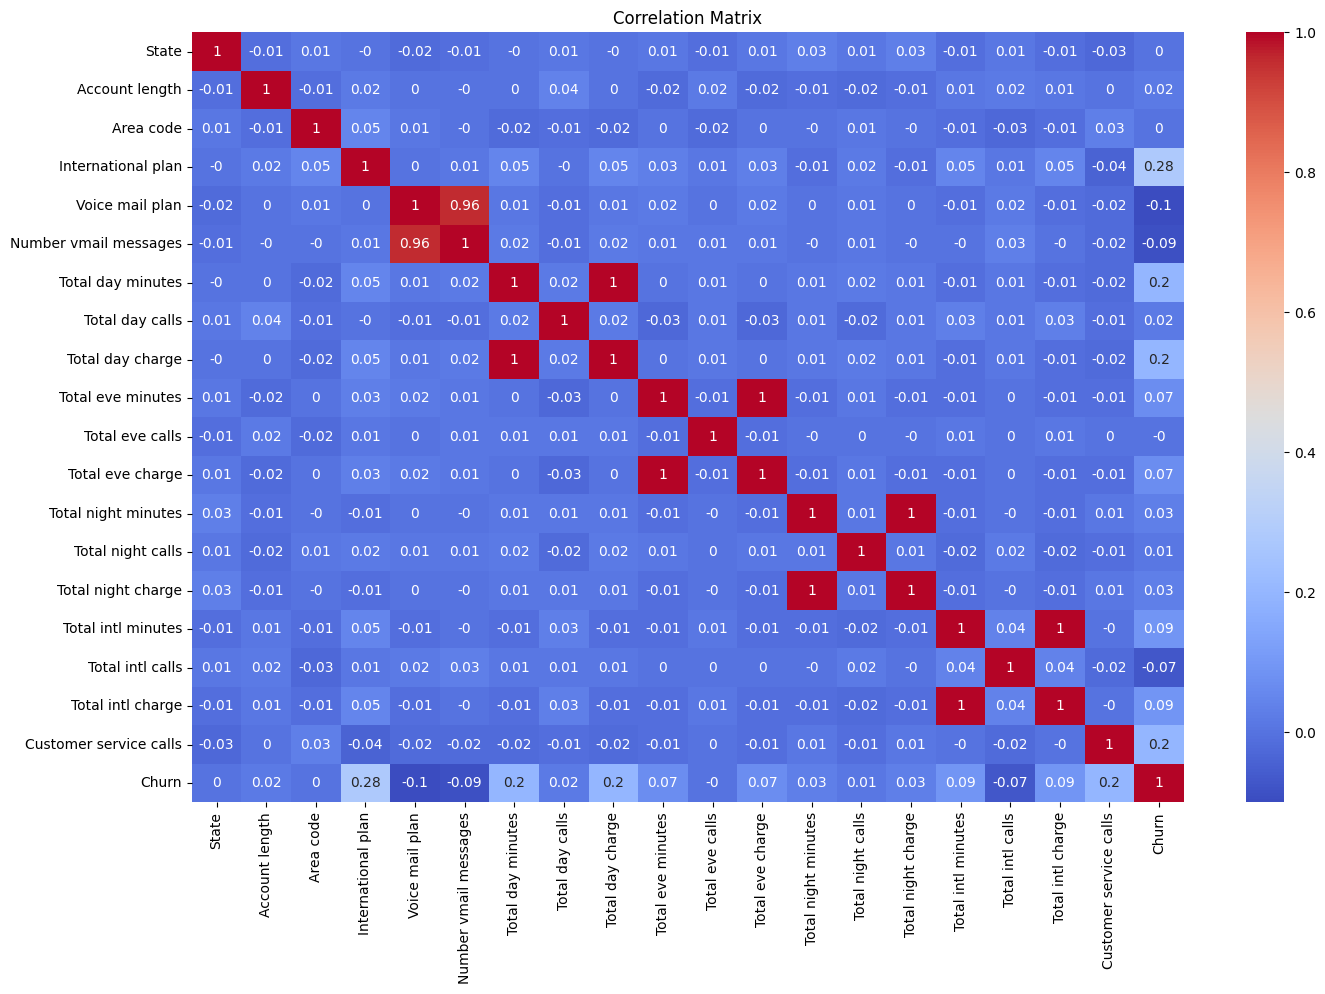

In [17]:
plt.figure(figsize=(16, 10))
sns.heatmap(train_df.corr().round(2), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dropping redundant data

In [18]:
drop_cols = ['Voice mail plan', 'Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
train_df = train_df.drop(drop_cols, axis = 1)
test_df = test_df.drop(drop_cols, axis = 1)

Creating new columns

In [19]:
time_cols = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
freq_cols = ['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls']

train_df['Total minutes'] = train_df[time_cols].sum(axis = 1)
train_df['Total calls'] = train_df[freq_cols].sum(axis = 1)
train_df = train_df.drop(time_cols + freq_cols, axis = 1)

test_df['Total minutes'] = test_df[time_cols].sum(axis = 1)
test_df['Total calls'] = test_df[freq_cols].sum(axis = 1)
test_df = test_df.drop(time_cols + freq_cols, axis = 1)

Final Correlation Matrix

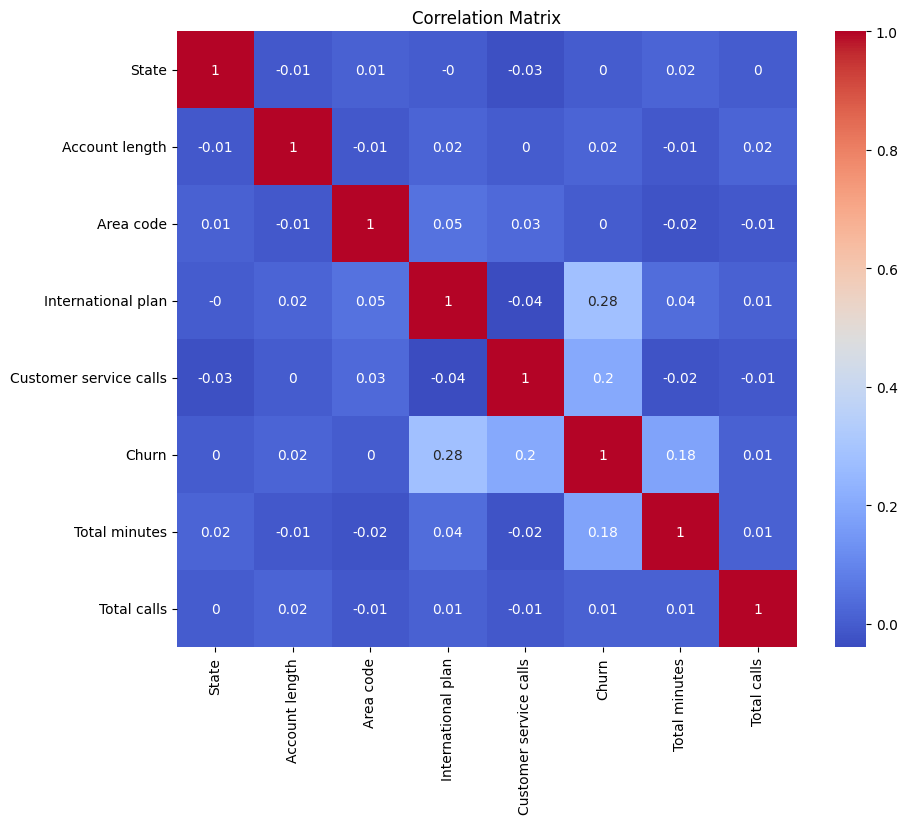

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr().round(2), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Machine Learning

Splitting Datasets

In [21]:
X_train = train_df[['International plan', 'Customer service calls', 'Total minutes']]
y_train = train_df['Churn']

X_test = test_df[['International plan', 'Customer service calls', 'Total minutes']]
y_test = test_df['Churn']

Scaling Features

In [22]:
scaler = ss()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Model

In [23]:
model = lr()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Model Evaluation

Accuracy Score and Classification Report

In [24]:
print("Accuracy score:", round(acc(y_test, y_pred), 5))
print("\nClassification report:")
print(cr(y_test, y_pred))

Accuracy score: 0.85457

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       572
           1       0.46      0.12      0.18        95

    accuracy                           0.85       667
   macro avg       0.66      0.55      0.55       667
weighted avg       0.81      0.85      0.82       667



Confusion Matrix

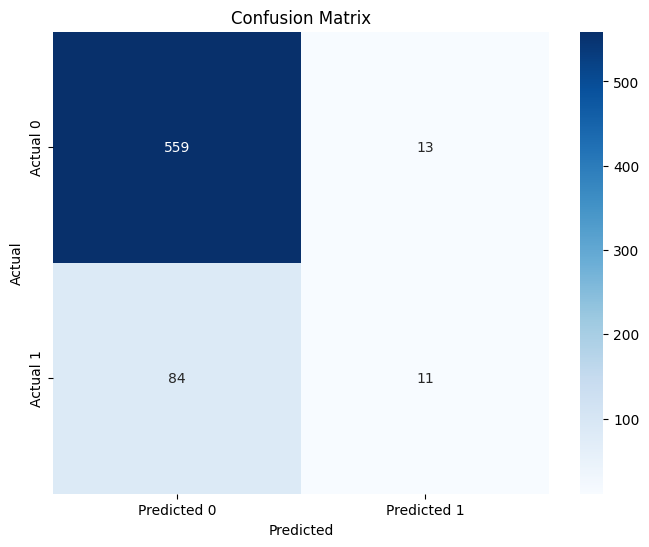

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Predicted 0', 'Predicted 1'], yticklabels = ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Visualising Model Details

Plotting Model

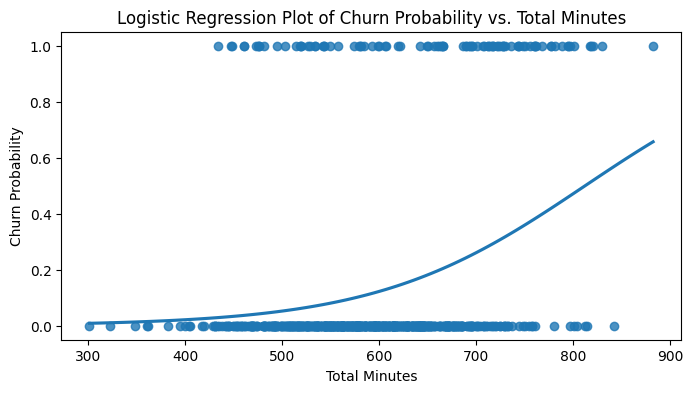

In [26]:
plt.figure(figsize = (8, 4))
sns.regplot(x = 'Total minutes', y = 'Churn', data = test_df, logistic = True, ci = None)
plt.xlabel('Total Minutes')
plt.ylabel('Churn Probability')
plt.title('Logistic Regression Plot of Churn Probability vs. Total Minutes')
plt.show()

Explaining Model

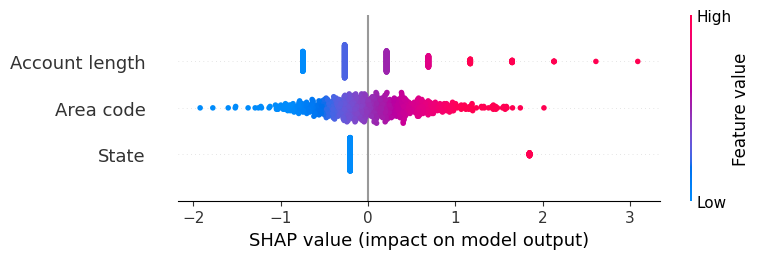

In [27]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names = test_df.drop('Churn', axis = 1).columns)

#Classifying Churn Segments

Setting criteria for segments

In [28]:
test_df['Churn predicted'] = y_pred
usage_threshold = test_df['Total minutes'].quantile(0.25)

def segment_customer(row):
    if row['Churn predicted'] == 1 and row['Customer service calls'] >= 3:
        return 'At Risk'
    elif row['Total minutes'] < usage_threshold:
        return 'Dormant'
    else:
        return 'Loyal'

test_df['Segment'] = test_df.apply(segment_customer, axis=1)

In [29]:
test_df.head()

,State,Account length,Area code,International plan,Customer service calls,Churn,Total minutes,Total calls,Churn predicted,Segment
0,18,117,408,0,1,0,760.6,271,0,Loyal
1,15,65,415,0,4,1,579.1,337,0,Loyal
2,34,161,415,0,4,1,816.7,301,1,At Risk
3,40,111,415,0,2,0,445.0,316,0,Dormant
4,11,49,510,0,1,0,524.2,317,0,Dormant


Plotting no. of Loyal, Dormant and At Risk Customers

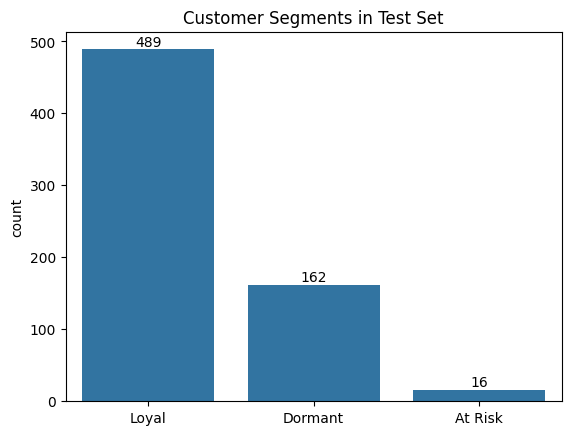

In [30]:
segment_order = test_df['Segment'].value_counts().index

ax = sns.countplot(data = test_df, x = 'Segment', order = segment_order)
plt.xlabel('')
plt.title("Customer Segments in Test Set")
for container in ax.containers:
    ax.bar_label(container)
plt.show()